<a href="https://colab.research.google.com/github/dhamwarich/Regression/blob/main/Regression_%E2%80%93_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

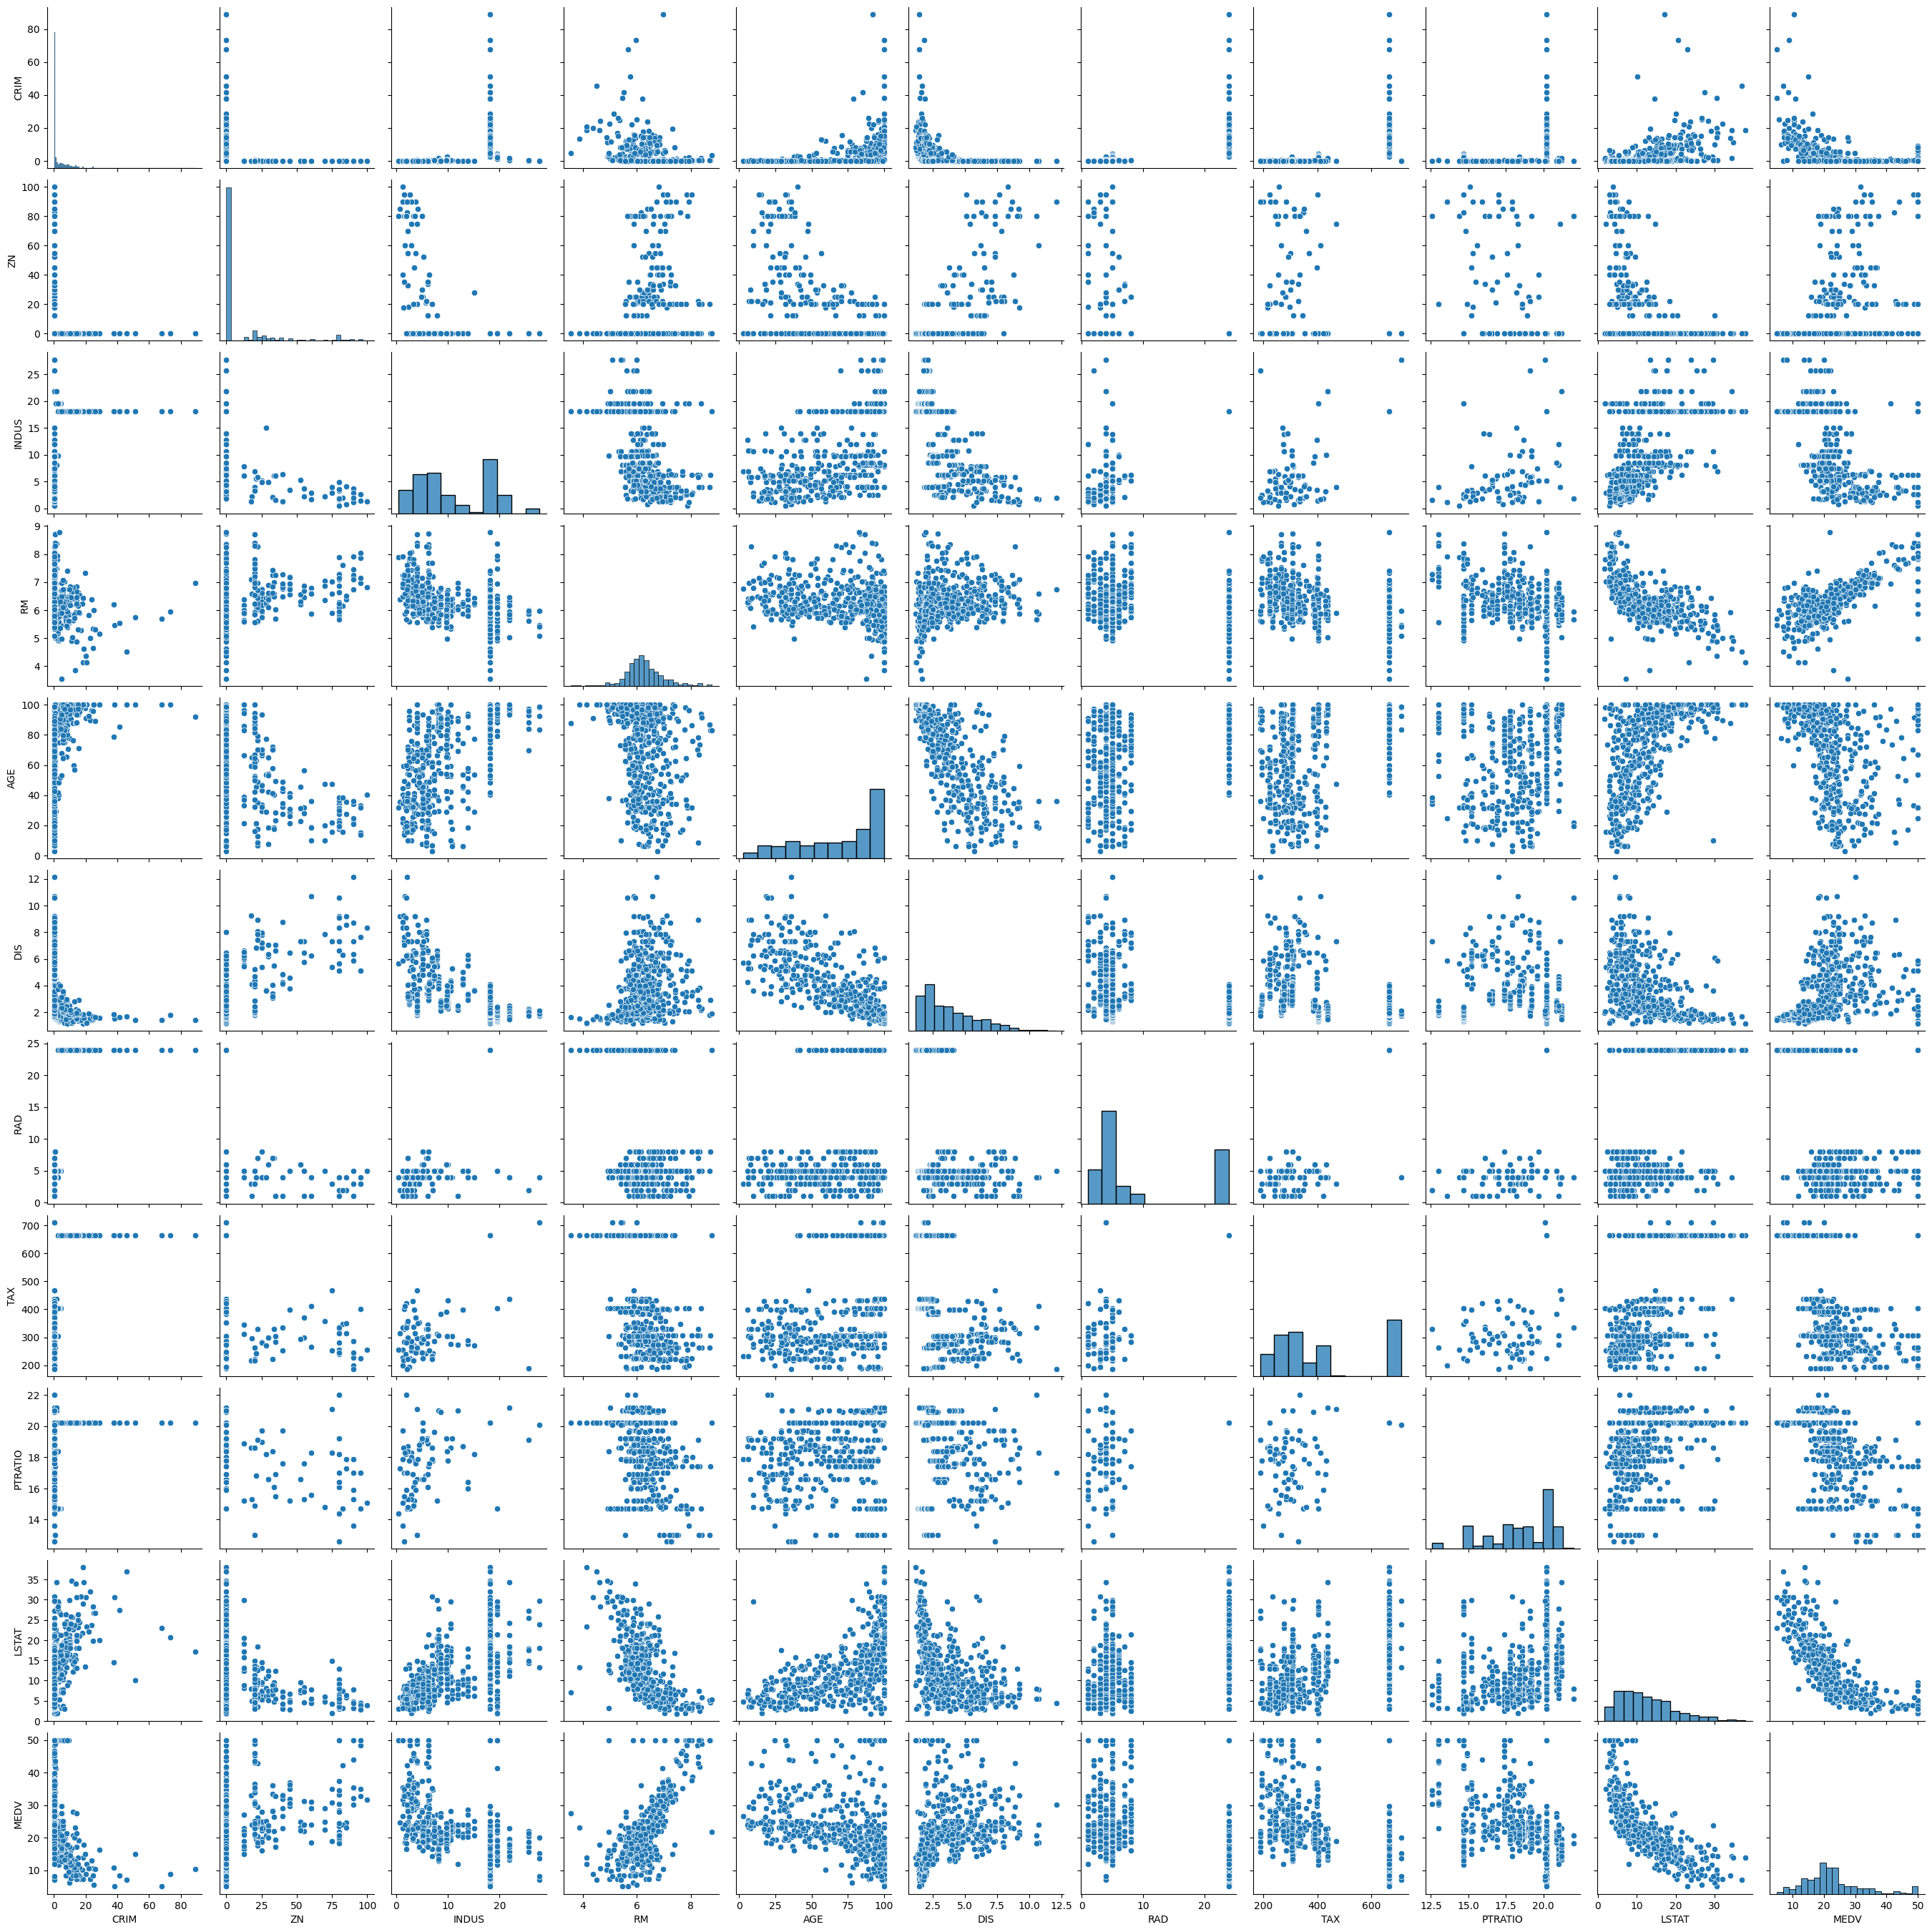

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Linear Regression RMSE: 4.928602182665336
Random Forest Regression RMSE: 2.8129602438238144


In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset from local file with whitespace delimiter
file_path = "housing.csv"
boston_df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Assign column names based on the description provided
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df.columns = column_names

# Step 3: Perform exploratory data analysis (EDA)
print(boston_df.head())
print(boston_df.describe())

# Visualize the data
sns.pairplot(boston_df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']])
plt.show()

# Step 4: Handle missing values and preprocess the data
# Check for missing values
print(boston_df.isnull().sum())

# No missing values found, proceed with preprocessing

# Split the data into features and target
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Building
# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Build Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 6: Evaluate the models
# Predict on the testing set
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Calculate RMSE for each model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Step 7: Results Summary
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest Regression RMSE:", rf_rmse)



Linear Regression RMSE: 4.928602182665336
Random Forest Regression RMSE: 2.8129602438238144
    Feature  Importance
5        RM    0.503845
12    LSTAT    0.309509
7       DIS    0.060549
0      CRIM    0.038062
10  PTRATIO    0.016313
9       TAX    0.015661
4       NOX    0.015544
6       AGE    0.013840
11        B    0.012154
2     INDUS    0.007953
8       RAD    0.003811
1        ZN    0.001756
3      CHAS    0.001004


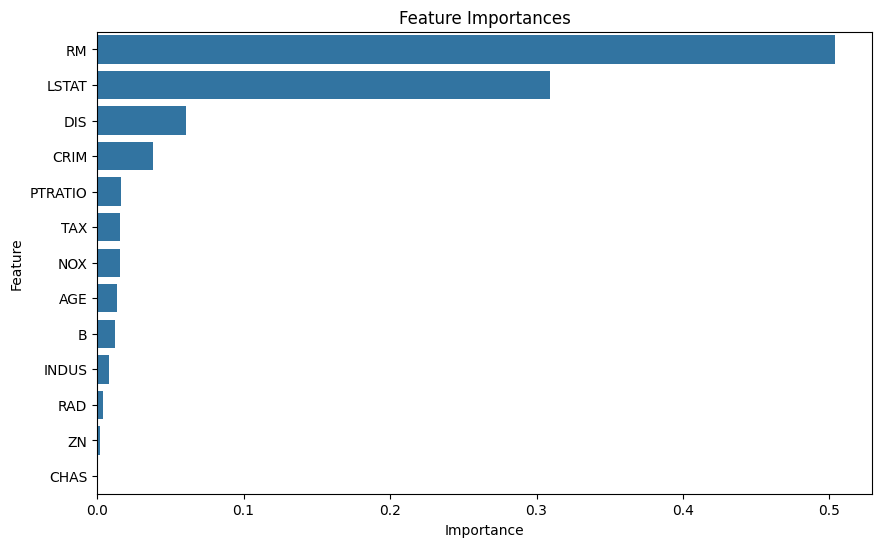

In [11]:
# Step 4: Data Preprocessing

# No missing values found, proceed with preprocessing
# Split the data into features and target
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Building

# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Build Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 6: Evaluation

# Predict on the testing set
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Calculate RMSE for each model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Step 7: Results Summary

print("Linear Regression RMSE:", lr_rmse)
print("Random Forest Regression RMSE:", rf_rmse)

# Step 8: Feature Importance

# Get feature importances from Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances')
plt.show()


Linear Regression RMSE: 4.928602182665336
Random Forest Regression RMSE: 2.8129602438238144


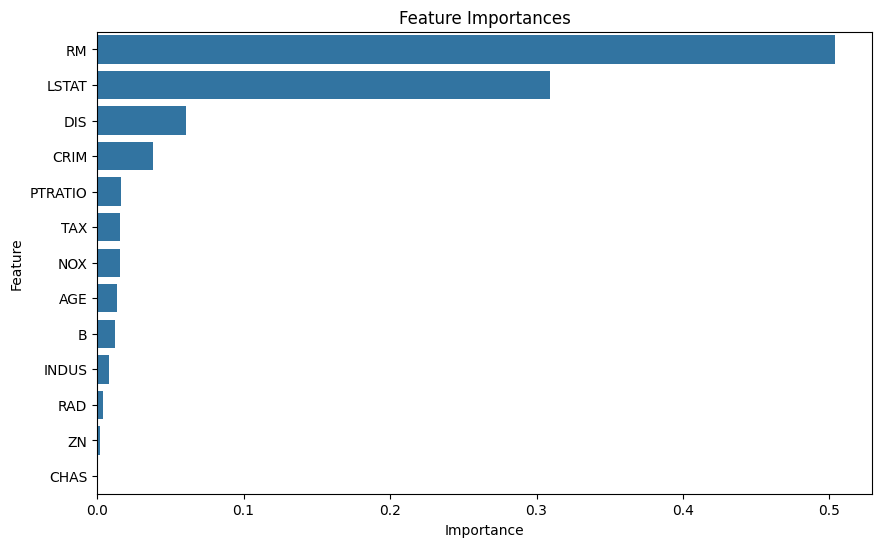

In [12]:
# Step 9: Model Comparison and Insights

# Compare the performance of the models
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest Regression RMSE:", rf_rmse)

# Discuss which model performs better and why
# In this case, we can see that the Random Forest Regression model has a lower RMSE compared to the Linear Regression model,
# indicating that it performs better in predicting the median house prices in Boston.

# Provide insights into the features that are most important for the task
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances')
plt.show()

# From the feature importances plot, we can see that the most important features for predicting the median house prices
# in Boston according to the Random Forest model are 'LSTAT' (% lower status of the population), 'RM' (average number of rooms per dwelling),
# and 'DIS' (weighted distances to five Boston employment centers).
# This suggests that areas with lower status populations, more rooms per dwelling, and closer proximity to employment centers
# tend to have higher median house prices in Boston.

# Step 10: Final Remarks

# Provide any final remarks or conclusions about the analysis
# Overall, we have conducted a comprehensive analysis of the Boston housing dataset, including data exploration, preprocessing,
# model building, evaluation, and analysis of feature importance.
# The Random Forest Regression model outperformed the Linear Regression model in predicting median house prices,
# and we identified key features that influence house prices in Boston.
# This analysis can provide valuable insights for stakeholders in the real estate industry or policymakers.



In [13]:
# Predict the median house prices in Boston using the trained models
lr_predicted_prices = lr_model.predict(X_test_scaled)
rf_predicted_prices = rf_model.predict(X_test_scaled)

# Display some of the predicted prices
print("Linear Regression Predicted Prices:", lr_predicted_prices[:5])
print("Random Forest Regression Predicted Prices:", rf_predicted_prices[:5])

Linear Regression Predicted Prices: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
Random Forest Regression Predicted Prices: [22.839 30.689 16.317 23.51  16.819]
